In [16]:
#Import necessary packages.
import pandas as pd
import matplotlib.pyplot as plt

#Import necessary data
data2006 = pd.read_csv(r'./Data/FIFAWorldCup2006.csv')
data2018 = pd.read_csv(r'./Data/FIFAWorldCup2018.csv')
data2014 = pd.read_csv(r'./Data/FIFAWorldCup2014.csv')
data2010 = pd.read_csv(r'./Data/FIFAWorldCup2010.csv')

#Stats about data sets
print("Dimensions of FIFA WC 2018: {}rows X {}columns".format(data2018.shape[0],data2018.shape[1]))
print("Dimensions of FIFA WC 2014: {}rows X {}columns".format(data2014.shape[0],data2014.shape[1]))
print("Dimensions of FIFA WC 2010: {}rows X {}columns".format(data2010.shape[0],data2010.shape[1]))
print("Dimensions of FIFA WC 2006: {}rows X {}columns".format(data2006.shape[0],data2006.shape[1]))


Dimensions of FIFA WC 2018: 64rows X 64columns
Dimensions of FIFA WC 2014: 64rows X 64columns
Dimensions of FIFA WC 2010: 64rows X 64columns
Dimensions of FIFA WC 2006: 64rows X 64columns
Dimensions of FIFA WC 2002: 64rows X 64columns


In [17]:
#DATA INTEGRATION
trainingData = pd.concat([data2006,data2010,data2014,data2018])

#DATA PREPROCESSING
namesOfColumnsToBeDropped = ["date_GMT","status","attendance","referee","stadium_name", "team_a_xg", "team_b_xg", "btts_percentage_pre_match", 
"over_15_percentage_pre_match", "over_25_percentage_pre_match","over_35_percentage_pre_match", "over_45_percentage_pre_match",
"over_15_HT_FHG_percentage_pre_match", "over_05_HT_FHG_percentage_pre_match", "over_15_2HG_percentage_pre_match", "over_05_2HG_percentage_pre_match"]

trainingData.drop(namesOfColumnsToBeDropped,axis=1,inplace=True)



In [18]:
home_team_result = []

#Generating prediction classes W,D,L where W = Win, D = Draw, L = Loss
for index,match in trainingData.iterrows():
    if(match["home_team_goal_count"]>match["away_team_goal_count"]):
        #print("{} {}:{} {}\t Home team won".format(match["home_team_name"],match["home_team_goal_count"],match["away_team_goal_count"],match["away_team_name"]))
        # Adding home_team_result attribute to get result of team1
        home_team_result.append("W")
    
    if(match["home_team_goal_count"]<match["away_team_goal_count"]):
        #print("{} {}:{} {}\t Away team won".format(match["home_team_name"],match["home_team_goal_count"],match["away_team_goal_count"],match["away_team_name"]))
        # Adding home_team_result attribute to get result of team1
        home_team_result.append("L")

    if(match["home_team_goal_count"]==match["away_team_goal_count"]):
        #print("{} {}:{} {}\t Draw".format(match["home_team_name"],match["home_team_goal_count"],match["away_team_goal_count"],match["away_team_name"]))
        # Adding home_team_result attribute to get result of team1
        home_team_result.append("D")

trainingData["home_team_result"] = home_team_result

#Writing Dataset.csv
trainingData.to_csv('./Data/Dataset.csv',index=False)

#Stats about trainingData
#print("Dimensions of training data: {}rows X {}columns".format(trainingData.shape[0],trainingData.shape[1]))

#Printing list of attributes
print(trainingData.columns)



Index(['timestamp', 'home_team_name', 'away_team_name', 'Game Week',
       'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg',
       'home_team_goal_count', 'away_team_goal_count', 'total_goal_count',
       'total_goals_at_half_time', 'home_team_goal_count_half_time',
       'away_team_goal_count_half_time', 'home_team_goal_timings',
       'away_team_goal_timings', 'home_team_corner_count',
       'away_team_corner_count', 'home_team_yellow_cards',
       'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_team_possession',
       'average_goals_per_match_pre_ma

In [19]:
#Getting statistics about attributes
print(trainingData.describe())

          timestamp   Game Week  Pre-Match PPG (Home)  Pre-Match PPG (Away)  \
count  3.200000e+02  240.000000            320.000000            320.000000   
mean   1.277059e+09    2.000000              1.400406              1.106969   
std    1.791940e+08    0.818203              1.250215              1.128244   
min    1.022845e+09    1.000000              0.000000              0.000000   
25%    1.150309e+09    1.000000              0.000000              0.000000   
50%    1.277180e+09    2.000000              1.500000              1.000000   
75%    1.403852e+09    3.000000              2.670000              2.000000   
max    1.531667e+09    3.000000              3.000000              3.000000   

         home_ppg    away_ppg  home_team_goal_count  away_team_goal_count  \
count  320.000000  320.000000            320.000000            320.000000   
mean     1.485187    1.285719              1.321875              1.156250   
std      0.758918    0.703979              1.269175      

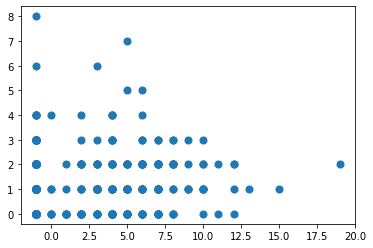

In [20]:
# Data Visualisation
goalsByHomeTeam = trainingData["home_team_goal_count"].values
cornersByHomeTeam = trainingData["home_team_corner_count"].values
plt.scatter(cornersByHomeTeam,goalsByHomeTeam,s=50)
plt.show()

